In [1]:
# %load K_ex2_3_1.py
# exercise 2.3.1

# Load zipdata.mat
---
This script loads zipdata.mat (matlab file). zipdata.mat contains data of handwritten digits used to write zip codes.


## Tags

### Pandas 

drop $\cdot$ between $\cdot$ unique $\cdot$ describe $\cdot$ info $\cdot$ value_counts() $\cdot$ to_frame $\cdot$ sort_index $\cdot$ index.astype $\cdot$ dtypes.value.counts $\cdot$

### Other Python tags

* image data
* load matlab (.mat) data file
sort (np)

## Structure
1. Load .mat data, convert to pandas dataframe and get an overview of data
2. Assign useful and imporant variables
3. Different pandas operations on the data

## About
**Contact Info** 2021 celiacailloux@gmail.com
 
**Exercise Name** exercise 2.3.1 (course 02450 DTU 2018)

---

In [168]:
# import standard modules
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
import scipy.linalg as linalg
import numpy as np
import pandas as pd

# 1. Load .mat data, convert to pandas dataframe

## Load .mat file

In [48]:
# Load Matlab data file and extract training set and test set
mat_data = loadmat('../Data/zipdata.mat')

In [49]:
# Compute the of the dictionary containing .mat data
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'testdata', 'traindata'])

## Convert .mat dict to pandas dataframe

In [153]:
# Convert to pandas dataframe and add column names
n_cols = mat_data['testdata'].shape[1]
col_name_y = ['class']
n_cols

257

In [68]:
col_names_X  = ['pixel {}'.format(i) for i in range(1, n_cols)] # 0th column is the y, ie. the class
col_names    = col_name_y + col_names_X               

In [69]:
data_test    = pd.DataFrame(mat_data['testdata'], 
                            columns = col_names )
data_train   = pd.DataFrame(mat_data['traindata'], 
                            columns = col_names )

In [70]:
data_test.head(5)

,class,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 247,pixel 248,pixel 249,pixel 250,pixel 251,pixel 252,pixel 253,pixel 254,pixel 255,pixel 256
0,9.0,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3.0,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


In [71]:
data_train.head(5)

,class,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 247,pixel 248,pixel 249,pixel 250,pixel 251,pixel 252,pixel 253,pixel 254,pixel 255,pixel 256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


# 2. Get acquainted with/verify you data

In [125]:
# Quick look at statistics 
# Identify any nulls
# Check out data types
# List number of each data type
data_test.describe()
#data_test.info(verbose = True, show_counts=True)
data_test.dtypes
data_test.dtypes.value_counts()

float64    257
dtype: int64

In [123]:
# Quick look at statistics 
# Identify any nulls
data_train.describe()
#data_train.info(verbose = True, show_counts = True)
data_train.dtypes
data_train.dtypes.value_counts()

float64    257
dtype: int64

# 2. Assign useful and imporant variables

Features and classe, length etc (X, y, N, M)

## Assign y  - training and test

In [132]:
# Assign X by dropping the first column
# axis=1 referes to it dropping a column (ie. axis=0 is dropping a row)
# inplace=True means that it works of the original df

y_train = data_train[['class']] # importan to use double []
y_test = data_test[['class']]

In [150]:
# Show Test Data
y_train.head(5)
y_test.head(5)

,class
0,9.0
1,6.0
2,3.0
3,6.0
4,6.0


## Class names

In [136]:
classNamesList = sorted(y_train['class'].unique())
classNamesList

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [138]:
classDict = dict(zip(classNamesList, range(len(classNamesList))))
classDict

{0.0: 0,
 1.0: 1,
 2.0: 2,
 3.0: 3,
 4.0: 4,
 5.0: 5,
 6.0: 6,
 7.0: 7,
 8.0: 8,
 9.0: 9}

In [142]:
classNames = y_train[['class']].drop_duplicates().reset_index(drop=True)
classNames

,class
0,6.0
1,5.0
2,4.0
3,7.0
4,3.0
5,1.0
6,0.0
7,8.0
8,2.0
9,9.0


## Assign X - training and test

In [ ]:
X_train = data_train.drop('class', axis = 1) 
X_test = data_test.drop('class', axis = 1)

In [145]:
# Check if M_train and M_test have the same length
if M_train == M_test:
    print('Good job!\n\tNumber of features (M) for both')
    print('\ttraining and test data are equal.')
else:
    print('Double check training and test data!')
    print('\tM_train: {}\nM_test: {}'.format(M_train, M_test))

Good job!
	Number of features (M) for both
	training and test data are equal.


In [146]:
# Check if y and X have the same number of observations (N)
if y_train.shape[0] == X_train.shape[0]:
    print('Good job!\n\ty and X have same dimensions!')
else:
    print('Double check y and X!')
    print('\ty shape: {}\nX shape: {}'.format(y.shape, X.shape))

Good job!
	y and X have same dimensions!


In [148]:
# Show Training Data
X_train.head(5)
X_test.head(5)

,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,...,pixel 247,pixel 248,pixel 249,pixel 250,pixel 251,pixel 252,pixel 253,pixel 254,pixel 255,pixel 256
0,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,0.904,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,0.853,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,0.802,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


## Dimensionality constants
* Number of observations *N*
* Number of Attributes *M*
* Number of classes *C*

In [165]:
# Compute values of N, M and C.
N = len(y_train)        # number of observations
M = X_train.shape[1]
C = len(classNames)     # number of classes
sqrt_M = np.sqrt(M)

In [166]:
N_train, M_train = N, M
N_test, M_test = N, M

# 3. Different pandas operations on the data

## Train data

In [13]:
# show only classes between i and j
i = 0
j = 9
test_between = train_data[train_data['class'].between(i,j)]
test_between.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [14]:
# Returns the uniques without sorting is
uniques = test_between['class'].unique()
uniques.sort()  # uncomment to sort
uniques

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [15]:
# Count how many times you the unique values in 'class' apears
unique_counts = test_between['class'].value_counts().to_frame('counts')
# unique_counts.index.name = 'class'
unique_counts.sort_index(inplace = True)
unique_counts['class'] = unique_counts.index.astype('int32')

In [16]:
unique_counts

,counts,class
0.0,1194,0
1.0,1005,1
2.0,731,2
3.0,658,3
4.0,652,4
5.0,556,5
6.0,664,6
7.0,645,7
8.0,542,8
9.0,644,9


Text(0, 0.5, 'Counts')

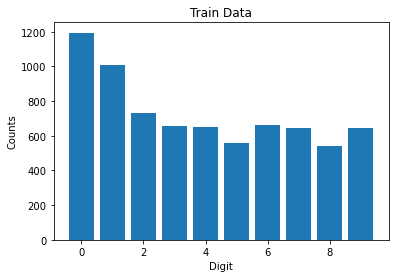

In [172]:
plt.bar(unique_counts['class'], unique_counts['counts'])
plt.title('Train Data')
plt.xlabel('Digit')
plt.ylabel('Counts')

In [18]:
# unique_counts.index

## Test data

In [182]:
# Returns the uniques and sort
uniques_test = test_data['class'].unique()
uniques_test.sort()  # uncomment to sort
# Count how many times you the unique values in 'class' apears
unique_counts_test = test_data['class'].value_counts().to_frame('counts')
unique_counts_test.sort_index(inplace = True) # sort it by index
unique_counts_test['class'] = unique_counts.index.astype('int32') # convert to integer
unique_counts_test

,counts,class
0.0,359,0
1.0,264,1
2.0,198,2
3.0,166,3
4.0,200,4
5.0,160,5
6.0,170,6
7.0,147,7
8.0,166,8
9.0,177,9


Text(0, 0.5, 'Counts')

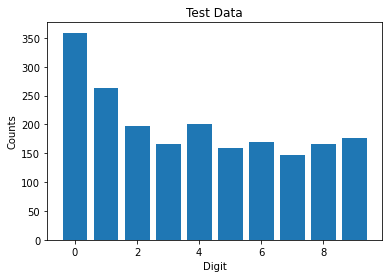

In [185]:
plt.bar(unique_counts_test['class'], unique_counts_test['counts'])
plt.title('Test Data')
plt.xlabel('Digit')
plt.ylabel('Counts')

## Return all digits values that appear less than 600 times

In [19]:
# find "anomaly" find that class, where the counts are less than 600
[_class for _class in unique_counts.index if len(test_between[test_between['class'] == _class]) <= 600]

[5.0, 8.0]

# 5. Message printet when running the script

In [32]:
print('----------------------------------------')
print('Zip Data Succesfully Loaded')
print('Run %whos to view all imported variables')
print('----------------------------------------')

----------------------------------------
Zip Data Succesfully Loaded
Run %whos to view all imported variables
----------------------------------------
